# Imports

In [56]:
import numpy as np
import pandas as pd
from pandas import DataFrame as dataframe
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import join
# from tqdm import tqdm


# # import shap

# # !pip install xgboost
# # clear_output()
# # check xgboost version
# import xgboost
# print(xgboost.__version__)
# from xgboost import XGBClassifier

In [46]:
print(os.getcwd())

base_dir = os.getcwd()
paths={
    'raw': join(base_dir, 'data'),
    'processed': join(base_dir, 'processed'),
    'models': join(base_dir, 'models')
}

D:\mh100\MH-100K-dataset


In [4]:
os.listdir(paths['processed'])

['.ipynb_checkpoints',
 'mh100-features-all.csv',
 'mh100-features-classes.csv',
 'mh100.npy',
 'mh100_labels.csv',
 'mh100_vt-labels.csv']

In [5]:
files = dataframe(os.listdir(paths['processed']), columns=['filename'])
files

,filename
0,.ipynb_checkpoints
1,mh100-features-all.csv
2,mh100-features-classes.csv
3,mh100.npy
4,mh100_labels.csv
5,mh100_vt-labels.csv


# Load MH100 dataset

In [32]:
def load_mh100(dataset_path, labels_path, features_path):
    dataset = np.load(dataset_path)
    labels = pd.read_csv(labels_path, index_col=0)
    feature_names =  pd.read_csv(features_path, index_col=0)    
    classes_names = ['benign', 'malware']
    return dataset, labels, feature_names, classes_names

In [26]:
os.listdir(paths['processed'])

['.ipynb_checkpoints',
 'mh100-features-all.csv',
 'mh100-features-classes.csv',
 'mh100.npy',
 'mh100_labels.csv',
 'mh100_vt-labels.csv']

In [33]:
data, labels, feature_names, classes_names = load_mh100(
    dataset_path =join(paths['processed'], 'mh100.npy'),
    labels_path = join(paths['processed'], 'mh100_labels.csv'),
    features_path = join(paths['processed'], 'mh100-features-all.csv')
)

In [76]:
print(data.shape, labels.shape, feature_names.shape)

(101934, 24833) (101934, 9) (24833, 1)


In [35]:
labels

,SHA256,NOME,PACOTE,API_MIN,API,vt_detection,CLASS,VT_Malware_Deteccao,AZ_Malware_Deteccao
0,080da3f89e42250d7462e17b40535cfca9b1a6a8370a31...,2019 شاب دوزي‎,com.arabprod.aghani.douzi,10,26,0,0,0,0
1,461760796dd7789673cfaf68383da103033d54eb4a5267...,Ishas,appinventor.ai_shameertanur.Ishas,7,28,0,0,1,0
2,dab8b14c3178b15200b23e47cecb9cc26b51c87d599ac0...,Lashes&Go,net.flowww.z.sk596381,16,26,0,0,0,0
3,db802025f9ec474d79793ac2aac556d2b52162ebc493e2...,58到家,com.wuba.jiazheng,17,25,5,1,5,5
4,a44920abdd4915117412ad7695b8d95a1da5edfa513b09...,TEDDY AFRO,million.t.com.teddy.afro.com,16,27,2,1,1,2
...,...,...,...,...,...,...,...,...,...
101929,67c2668b321c1cd06e3b4f54261e9bc24d0be1ece92ed5...,Eric Clapton Lyrics,com.msmstudios.ericclyrics,15,23,6,1,4,6
101930,67c26a0ba216d216f652d6534225bc0534c4583fde6500...,Miner,com.PIG.Miner,16,27,0,0,0,0
101931,67c272489d9a82dbdc73a2da78167e035d88764c98ba3f...,Webloaded Tech,com.webloadedblog,21,29,0,0,0,0
101932,67c2744111f1ecdf28faf89ace9bf91d10163001db7bd7...,RepostExchange,com.repostexchange.app,23,28,0,0,0,0


In [77]:
feature_names

,features
index,
5,Permission::WAKE_LOCK
6,Permission::WRITE_EXTERNAL_STORAGE
7,Permission::ACCESS_NETWORK_STATE
8,Permission::WRITE_SETTINGS
9,Permission::INTERNET
...,...
24837,APICall::Landroid/widget/TableRow.getLeft()
24838,APICall::Landroid/widget/HorizontalScrollView....
24839,APICall::Landroid/widget/RatingBar.isFocusable()


In [30]:
vt_labels = pd.read_csv(join(paths['processed'],'mh100_vt-labels.csv'))
vt_labels.drop(columns=['index'], inplace=True)
vt_labels

,1-class,2-class,3-class,4-class,5-class,6-class,7-class,8-class,9-class,10-class,...,31-class,32-class,33-class,34-class,37-class,38-class,39-class,41-class,43-class,46-class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101929,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101930,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
vt_labels['4-class'].value_counts()

4-class
0    92134
1     9800
Name: count, dtype: int64

## Train test split

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [40]:
## Train test split

id_train, id_val = train_test_split(range(0, data.shape[0]), test_size=0.2, random_state=0, shuffle=True)
print(len(id_train), len(id_val))

X_train = np.expand_dims(data[id_train], 2)
X_val = np.expand_dims(data[id_val], 2)
y_train = vt_labels.iloc[id_train]['4-class']
y_val = vt_labels.iloc[id_val]['4-class']

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

81547 20387
(81547, 24833, 1) (20387, 24833, 1)
(81547,) (20387,)


In [41]:
# ## Split dataset
#X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=0, shuffle=True)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)
encoder = OneHotEncoder(dtype=int)
encoder.fit(np.expand_dims(y_train.values, axis=1))
y_train_ohe = encoder.transform(np.expand_dims(y_train.values, axis=1))
y_val_ohe = encoder.transform(np.expand_dims(y_val.values, axis=1))

print(dataframe(y_train).value_counts(), dataframe(y_val).value_counts())

(81547, 24833, 1) (20387, 24833, 1) (81547,) (20387,)
4-class
0          73752
1           7795
Name: count, dtype: int64 4-class
0          18382
1           2005
Name: count, dtype: int64


# Train a model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

In [57]:
def plot_cm(cm, figsize=(4, 3)):
    fig= plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, cmap='Blues', linewidth=.5, fmt=".1f")
    return

In [45]:
# For RandomForest

model = RandomForestClassifier()
model.fit(X_train.squeeze(), y_train)   # High Resource Usage for mh100 dataset. Try to use a sampling to less resource

RandomForestClassifier()

In [47]:
import pickle

# save model
# with open(os.path.join(paths['models'], 'rf-model-mh100.pkl'),'wb') as f:
#     pickle.dump(model, f)

In [49]:
y_pred=model.predict(X_val.squeeze())

In [52]:
acc = metrics.accuracy_score(y_val, y_pred)
acc

0.9757688723205965

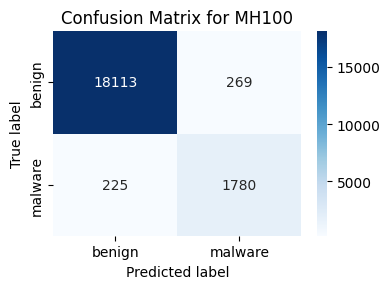

In [90]:
cm = confusion_matrix(y_val, y_pred)
# 
# plot_cm(cm, figsize=(4, 3))

figure = plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix for MH100')
plt.xticks(ticks=[.5, 1.5], labels = classes_names)
plt.yticks(ticks=[.5, 1.5], labels = classes_names)
plt.tight_layout()
# plt.savefig(join(paths['models'], name__+'_cm.png'), format='png')

In [66]:
classification_report(y_true=y_val, y_pred=y_pred, target_names=classes_names, output_dict=True)


{'benign': {'precision': 0.9877303958992256,
  'recall': 0.9853661190294853,
  'f1-score': 0.9865468409586057,
  'support': 18382.0},
 'malware': {'precision': 0.8687164470473402,
  'recall': 0.8877805486284289,
  'f1-score': 0.8781450419338924,
  'support': 2005.0},
 'accuracy': 0.9757688723205965,
 'macro avg': {'precision': 0.928223421473283,
  'recall': 0.9365733338289571,
  'f1-score': 0.932345941446249,
  'support': 20387.0},
 'weighted avg': {'precision': 0.9760257327585953,
  'recall': 0.9757688723205965,
  'f1-score': 0.9758858507665935,
  'support': 20387.0}}

In [67]:
def plot_importance(model, threshold=0.01, feature_names=[], figsize=(4, 3)):
    fig= plt.figure(figsize=figsize)
    indices = np.argsort(model.feature_importances_)
    importance = dataframe({'features':feature_names[indices], 'values': model.feature_importances_[indices]})
    importance = importance[::-1].reset_index(drop=True)
    sns.barplot(data=importance[importance['values']>threshold],
           y='features', x='values',
           orient= 'h')

    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing importance scores")
    plt.yticks(fontsize=6)
    # plt.legend(xg_model.classes_)
    plt.show()
    return importance

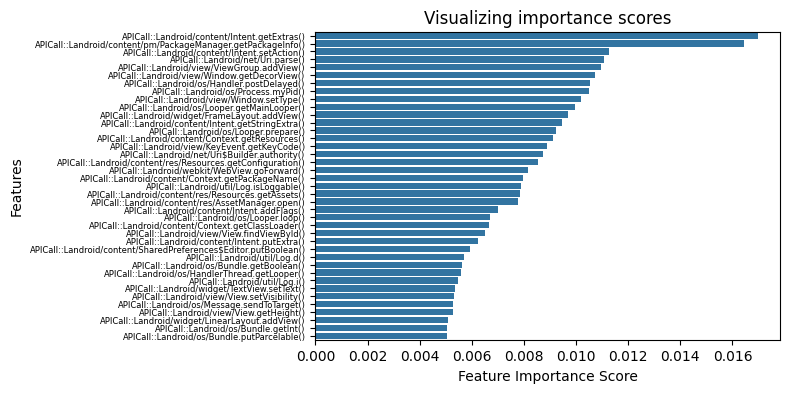

In [86]:
importance = plot_importance(model, threshold=0.005, feature_names=feature_names.features.values, figsize=(6, 4))

In [92]:
report = classification_report(y_true=y_val, y_pred=y_pred, target_names=classes_names)
print(report)

              precision    recall  f1-score   support

      benign       0.99      0.99      0.99     18382
     malware       0.87      0.89      0.88      2005

    accuracy                           0.98     20387
   macro avg       0.93      0.94      0.93     20387
weighted avg       0.98      0.98      0.98     20387



In [ ]:
# with open(join(paths['models'], name__+'_report.json'), 'w') as outfile:
#     outfile.write(report)